In [1]:
""" setup """
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from scipy import signal
from pyhacores.under_construction.clock_recovery.gardner import GardnerTimingRecovery
from scipy.interpolate import interp1d

In [2]:
def fract_delay(sig, fract_delay=0.0):
    f = interp1d(range(len(sig)), sig)
    new_x = np.array(range(len(sig))) + fract_delay
    fract_sig = f(new_x[:-1])
    return fract_sig


def insig(bits, sps, int_delay=0, fd=0.0):
    nrz = [[1] * sps if x == 1 else [-1] * sps for x in bits]
    nrz = np.array(nrz).flatten()

    taps = [1 / sps] * sps
    matched = np.convolve(nrz, taps, mode='full')

    # delays
    sig = matched[int_delay:]
    sig = fract_delay(sig, fd)
    return sig

In [95]:
def case(ramp,i_delay=0, f_delay=0):
    data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]*16
    print(len(data))
#     data = [1, 0, 0, 1, 1]*32
    sps = 2
    sig = insig(data, sps, i_delay, f_delay)
    
    recover = GardnerTimingRecovery(sps, test_inject_error=ramp)

    ret, err, mu = recover.model_main(sig)
    
    plt.stem(ret, label='ret')
#     plt.show()
#     plt.stem(sig)
#     plt.show()
    plt.plot(err, label='err')
#     plt.show()
    plt.plot(mu, label='mu')
    plt.legend()
    plt.show()

288
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>
>


<IPython.core.display.Javascript object>


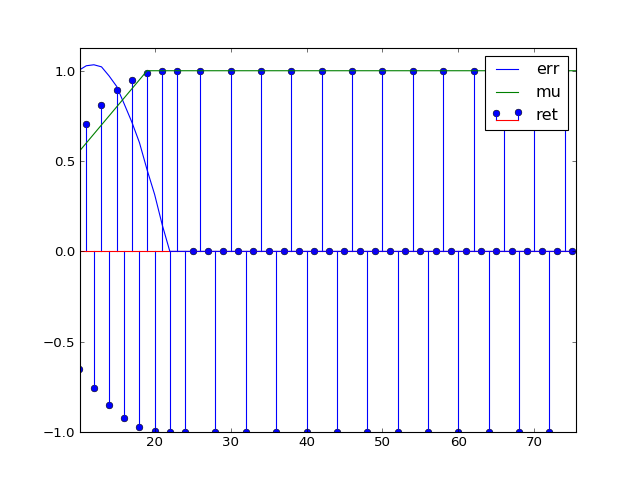

In [105]:
case(0.05, 0, 0)

288
<
<
<
<
<
<
<
<
<
<
<
<
<
<
<


<IPython.core.display.Javascript object>


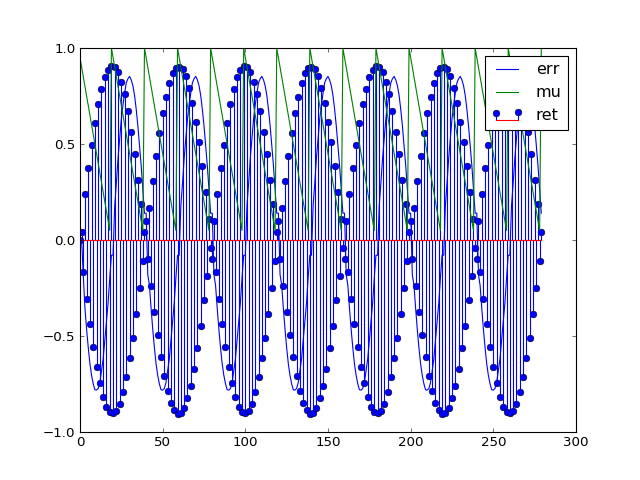

In [91]:
case(-0.05, 1, 0.1)

i:  19  <d: 0  mu:  1.0  o:  -0.57109138
i:  39  <d: 3  mu:  1.0  o:  -0.04123279
i:  59  <d: 2  mu:  1.0  o:  -0.4370484
i:  79  <d: 1  mu:  1.0  o:  0.98880279
i:  99  <d: 0  mu:  1.0  o:  -0.57109138
i:  119  <d: 3  mu:  1.0  o:  -0.04123279


<IPython.core.display.Javascript object>


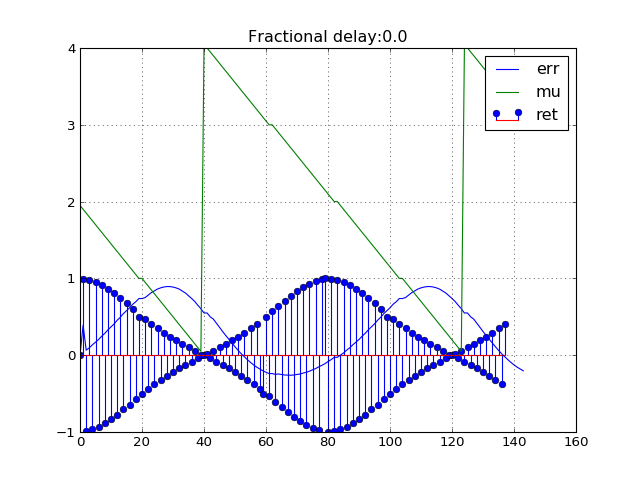

In [6]:
case(0.05, 0, 0.0)

i:  1  >d: 2  mu:  0.0  o:  0.0
i:  22  >d: 3  mu:  0.0  o:  -0.73356675775
i:  43  >d: 0  mu:  0.0  o:  -0.76456964275
i:  64  >d: 1  mu:  0.0  o:  -0.27583900425
i:  85  >d: 2  mu:  0.0  o:  -0.22585250925
i:  106  >d: 3  mu:  0.0  o:  -0.73356675775
i:  127  >d: 0  mu:  0.0  o:  -0.76456964275


<IPython.core.display.Javascript object>


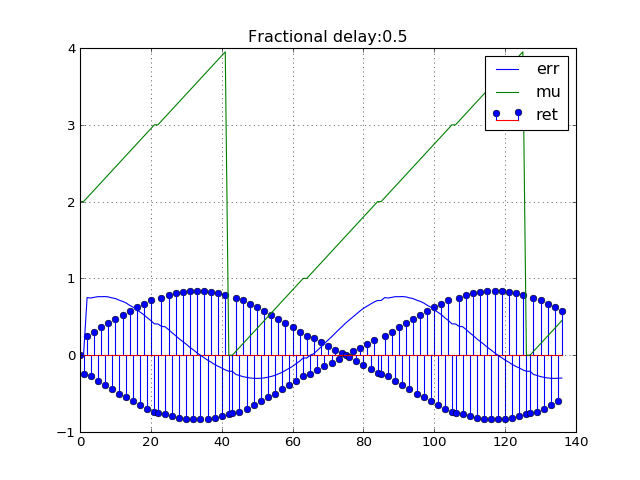

In [7]:
case(-0.05, 1, 0.5)